## Analyze Watch Description Data

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option("display.max_columns",None)
%matplotlib inline

In [117]:
! ls

additional_stats_mens.csv	    prestige_time_pics_mens
additional_stats_womens.csv	    prestige_time_pics_womens
all_watch_info.csv		    README.md
analyze_product_descriptions.ipynb  scrape_prestigetime_pages.ipynb
get_links_and_pics.ipynb	    watch_page_list_mens.csv
prestige_time_pages_mens	    watch_page_list_womens.csv
prestige_time_pages_womens


"Main" Watch Info

In [118]:
mens = pd.read_csv('watch_page_list_mens.csv')
womens = pd.read_csv('watch_page_list_womens.csv')

Additional Info from Watch's Page

In [119]:
mens_additional = pd.read_csv('additional_stats_mens.csv')
womens_additional = pd.read_csv('additional_stats_womens.csv')

Approx Number of Unique Mens Watches

In [120]:
len(mens['image_url'].unique())

6501

__Explore Product Details__ 

Combine all data into a single DF

In [121]:
mens_combo = mens.merge(mens_additional,how='inner',on='url')
womens_combo = womens.merge(womens_additional,how='inner',on='url')

# Add a Gender Label
mens_combo['gender'] = 'mens'
womens_combo['gender'] = 'womens'

combo = mens_combo.append(womens_combo)

Exclude Listings Without Photo

In [122]:
combo = combo.loc[
    combo['image_url']!='https://www.prestigetime.com/images/watches/pic-unavailable_main.jpg',:]

Exclude "Erotic" Watches with blocked out photos

In [123]:
bad_list= ['PerreletTurbine44mmA40204TURBINEEROTIC',
 'PerreletTurbine44mmA40211TURBINEEROTIC']

combo = combo.loc[combo['image_name'].isin(bad_list) == False,:]

Exclude watches that have the exact same picture as another watch

In [124]:
combo = combo.groupby('image_url').first().reset_index()

### Let's Make Simplified Product Descriptions

#### Create Additional labels

In [125]:
strap_words = ['Alligator & Rubber','Alligator/Crocodile Leather','Calfskin Leather',
              'Fabric','Leather','Ostrich','Python Leather','Rubber','Satin','Stingray']

For Now, white gold and platinum will be considered "stainless steel". Watches with any yellow, or rose gold, will be considered "gold."

In [126]:
gold_words = ['18kt Rose Gold','Stainless Steel & Rose Gold',
             '18kt Yellow Gold','18kt Everose Gold','Gold Plated',
             'Stainless Steel & Plated Rose Gold','Stainless Steel & Plated Yellow Gold',
             'Stainless Steel & Gold','Titanium & Rose Gold','Bronze',
             '18kt Honey Gold','18kt Rose & White Gold',
             'Ceramic and Gold']

In [127]:
combo['case_material_simple']  = [
    'gold' if material in gold_words else 'not gold' for material in combo['Case Material'] ]

combo['band_simple']  = [
    'strap' if material in strap_words else 'braclet' for material in combo['Band Material'] ]

### Save Combined Data Frame

In [128]:
combo.to_csv('all_watch_info.csv',index = False)

# Exploratory Analysis

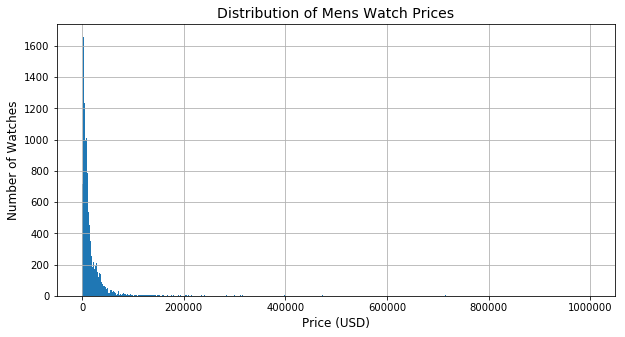

In [129]:
price_bins = np.arange(0,1000000,2000)
plt.figure(figsize=(10,5))
combo.price.hist(bins = price_bins )
plt.xlabel('Price (USD)',size =12)
plt.ylabel('Number of Watches',size = 12)
plt.title('Distribution of Mens Watch Prices',size = 14)

In [130]:
combo.groupby('case_material_simple').count()['brand'].sort_values()

case_material_simple
gold        3211
not gold    7316
Name: brand, dtype: int64

In [131]:
combo.groupby('Case Shape').count()['brand'].sort_values()

Case Shape
Cushion       104
Tonneau       124
Oval          137
Polygon       152
Rectangle     348
Square        591
Round        9070
Name: brand, dtype: int64

In [132]:
combo.groupby('band_simple').count()['brand']

band_simple
braclet    4569
strap      5958
Name: brand, dtype: int64